In [14]:
import pandas as pd

import matplotlib.pyplot as plt


In [6]:
data = pd.read_parquet('activity.parquet')


In [7]:
data

,isActive,sessionId,energyConsumed,duration,stationName,accountName,cost,totalCostLocal,date,name,id,accountId
0,False,67ff1e7cc2936a4d6336c872,47032.39,42483.642,Athletes Village Housing Co-operative,None,None,5.159453,2025-04-16 03:05:32,Stall # 100,3uBm3dnoM,None
1,False,67e6eefa52b3791f7cf49890,45442.29,73454.843,Athletes Village Housing Co-operative,None,None,4.985019,2025-03-28 18:48:26,Stall # 100,3uBm3dnoM,None
2,False,67c7bcfe64fe30f28b96d790,54085.70,46781.964,Athletes Village Housing Co-operative,None,None,5.933201,2025-03-05 02:54:54,Stall # 100,3uBm3dnoM,None
3,False,67b7d8f61fe53db5494036cc,52496.20,53266.961,Athletes Village Housing Co-operative,None,None,5.758833,2025-02-21 01:37:58,Stall # 100,3uBm3dnoM,None
4,False,67afed44db21231a016c50fc,44061.08,54855.655,Athletes Village Housing Co-operative,None,None,4.833500,2025-02-15 01:26:28,Stall # 100,3uBm3dnoM,None
...,...,...,...,...,...,...,...,...,...,...,...,...
4506,False,678c49d54ad4687db4c989ff,4673.27,59599.548,Athletes Village Housing Co-operative,None,None,0.512658,2025-01-19 00:39:49,Stall # 82,Q3YWIQu5Y,None
4507,False,678c09464ad4687db4c91dab,5163.35,6557.904,Athletes Village Housing Co-operative,None,None,0.566419,2025-01-18 20:04:22,Stall # 82,Q3YWIQu5Y,None
4508,False,678b1b624ad4687db4c70ee8,7486.63,47437.137,Athletes Village Housing Co-operative,None,None,0.821283,2025-01-18 03:09:22,Stall # 82,Q3YWIQu5Y,None
4509,False,66d32947602a50818383d6b6,5786.26,7258.569,Athletes Village Housing Co-operative,None,None,0.578626,2024-08-31 14:31:35,Stall # 82,Q3YWIQu5Y,None


In [70]:
data["date"] = data["date"].dt.floor("D")

result = []
for group, grouped_data in data.groupby("name"):
    grouped_data["energyConsumed"] = grouped_data["energyConsumed"] / 1000.
    grouped_data["cost"] = grouped_data["energyConsumed"] * 0.1044

    grouped_data = grouped_data.reset_index()
    grouped_data = grouped_data.set_index("date")

    grouped_data = grouped_data.resample("MS").agg(
        {
            "name": "first",
            "energyConsumed": "sum",
            "cost": "sum",
        }
    )
    result.append(grouped_data)

result = pd.concat(result).reset_index()

mask = result['cost'] > 1
mask &= (result['date'] < '2025-04-01')
mask &= (result['date'] > '2024-02-01')
result = result[mask]
print(result)


          date         name  energyConsumed       cost
1   2024-03-01  Stall # 100       123.50408  12.893826
2   2024-04-01  Stall # 100       153.68999  16.045235
3   2024-05-01  Stall # 100       131.53094  13.731830
4   2024-06-01  Stall # 100        86.20988   9.000311
5   2024-07-01  Stall # 100        87.37259   9.121698
..         ...          ...             ...        ...
131 2025-02-01   Stall # 78       167.59477  17.496894
132 2025-03-01   Stall # 78       130.09951  13.582389
144 2025-01-01   Stall # 82        75.44381   7.876334
145 2025-02-01   Stall # 82        98.90050  10.325212
146 2025-03-01   Stall # 82       134.10175  14.000223

[118 rows x 4 columns]


                   name  energyConsumed       cost
date                                              
2024-03-01  Stall # 100       123.50408  12.893826
2024-04-01  Stall # 100       153.68999  16.045235
2024-05-01  Stall # 100       131.53094  13.731830
2024-06-01  Stall # 100        86.20988   9.000311
2024-07-01  Stall # 100        87.37259   9.121698
2024-08-01  Stall # 100       134.14481  14.004718
2024-09-01  Stall # 100        91.76560   9.580329
2024-10-01  Stall # 100       146.76803  15.322582
2024-11-01  Stall # 100       102.47858  10.698764
2024-12-01  Stall # 100       197.11692  20.579006
2025-01-01  Stall # 100       140.01594  14.617664
2025-02-01  Stall # 100       140.04597  14.620799
2025-03-01  Stall # 100        99.52799  10.390722
                   name  energyConsumed       cost
date                                              
2024-03-01  Stall # 101       466.31411  48.683193
2024-04-01  Stall # 101       374.25697  39.072428
2024-05-01  Stall # 101       3

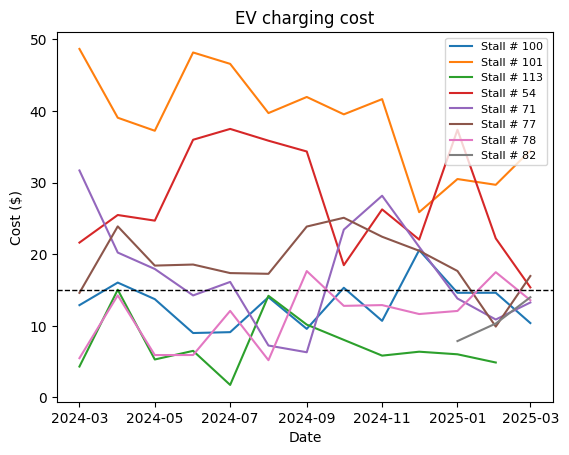

In [73]:
plt.figure()
for group, grouped_data in result.groupby("name"):
    grouped_data = grouped_data.set_index("date")
    
    if group.endswith(('45', '46')) or group is None:
        continue

    print(grouped_data)
    # mask = (grouped_data['cost'] > 1) & (grouped_data.index > '2024-02-01')
    plt.plot(grouped_data.index, grouped_data['cost'], label=group)
    plt.title("EV charging cost")
    plt.xlabel("Date")
    plt.ylabel("Cost ($)")
plt.legend(loc='upper right', fontsize=8)

plt.axhline(15, color='black', lw=1, ls='--')
# plt.axis([result['date'], '2025-03', 0, 50])


energyConsumed    198.714635
cost               20.745808
dtype: float64


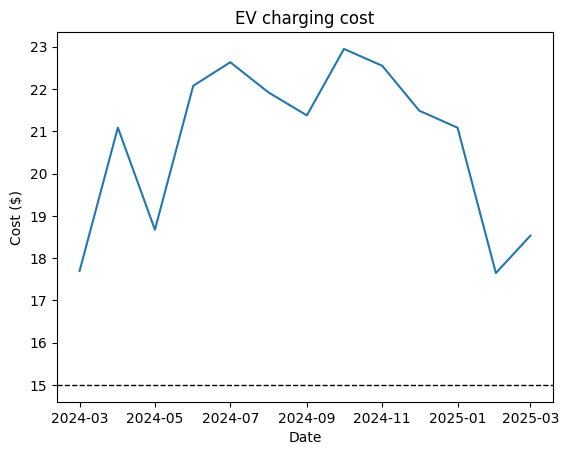

In [74]:
plt.figure()


monthly = result.reset_index().groupby("date").agg(
    {
        "energyConsumed": "mean",
        "cost": "mean",
    }
)
mask = (monthly['cost'] > 1) & (monthly.index > '2024-02-01') & (monthly.index < '2025-04-01')
print(monthly[mask].mean())
plt.plot(monthly.index[mask], monthly[mask]['cost'])
plt.title("EV charging cost")
plt.xlabel("Date")
plt.ylabel("Cost ($)")

plt.axhline(15, color='black', lw=1, ls='--')
# plt.axis([result.index[1], result.index[-1], 0, 50])


In [81]:
# print(result.groupby("name").mean())
result['cost_error'] = result['cost'] - 15

print(result.groupby("name")['cost_error'].sum())


name
Stall # 100    -24.392514
Stall # 101    308.297934
Stall # 113    -84.549364
Stall # 45     159.639283
Stall # 46     131.423109
Stall # 54     162.319747
Stall # 71      29.468418
Stall # 77      51.575176
Stall # 78     -47.942130
Stall # 82     -12.798231
Name: cost_error, dtype: float64
